Machine Learning Final Project

-- Pre Processing Data

In [269]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [270]:
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [271]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())



   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   romantic  famrel  freetime  goout  Dalc  Walc  health  abse

UNSUPERVISED MODEL
*kmeans clustering*

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [273]:
#drop the target variable
df_unsupervised = df.drop(columns=['G3'], errors = 'ignore')

In [274]:
#converting one hot encoding to binary
binary_columns_one_hot = ['Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other']

for col in binary_columns_one_hot:
    df_unsupervised[col] = df_unsupervised[col].map({True: 1, False: 0})

In [275]:
df_unsupervised

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,False,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,False,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,False,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,False,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,False,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,True,0,0,1,0,0,0,1,0,0,0,0,0,1
391,1,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,True,0,0,1,0,0,0,1,0,0,0,0,1,0
392,1,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,True,0,1,0,0,0,1,0,0,0,0,0,0,1
393,1,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,True,0,0,1,0,0,1,0,0,0,0,0,1,0


In [276]:
#standard scaler standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

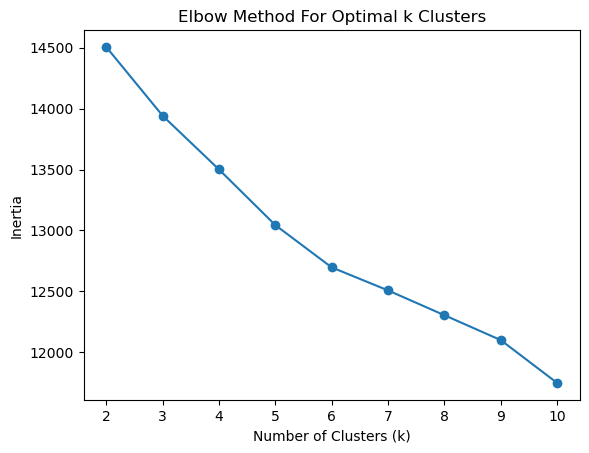

In [277]:
#elbow method, choosing k- optimal # of clusters
inertia = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k Clusters')
plt.show()

#elbow = where inertia drops and starts to levels off
#drop off = 6

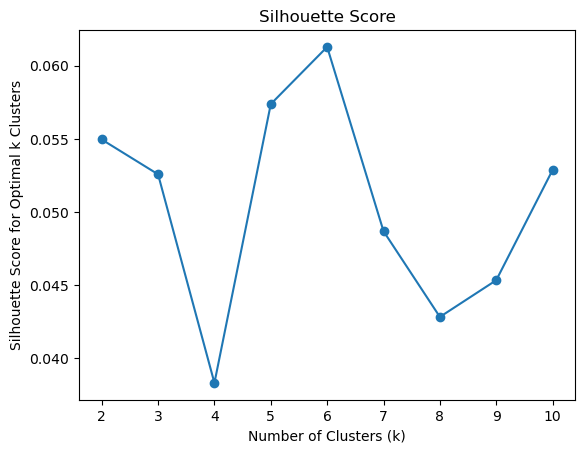

In [278]:
#silhouette score
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score for Optimal k Clusters')
plt.title('Silhouette Score')
plt.show()

k chosen is 6

In [279]:
#fit model with chosen k value, predict + assign clusters
kmeans = KMeans(n_clusters=6, random_state=0,init = 'k-means++', max_iter = 100, n_init = 10) #42
clusters = kmeans.fit_predict(X_scaled)

In [280]:
#cluster labels added to dataframe
df['Cluster'] = clusters

In [281]:
#avg value for each feature in each cluster, student profiles
cluster_summary = df.groupby('Cluster').mean()
pd.set_option('display.max_columns', None)
cluster_summary


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.354331,16.527559,0.708661,0.755906,0.913386,2.236220,2.110236,1.511811,2.141732,0.236220,0.181102,0.551181,0.385827,0.448819,0.787402,0.984252,0.677165,0.291339,3.968504,3.062992,3.015748,1.212598,2.047244,3.370079,5.015748,9.960630,0.110236,0.000000,0.755906,0.023622,0.000000,0.007874,0.881890,0.047244,0.015748,0.299213,0.031496,0.307087,0.787402,0.000000
1,0.661290,16.451613,0.790323,0.645161,0.903226,3.951613,3.370968,1.435484,2.048387,0.016129,0.064516,0.693548,0.596774,0.645161,0.903226,0.983871,0.903226,0.290323,3.854839,3.403226,3.016129,1.516129,2.193548,3.532258,4.693548,11.016129,0.112903,0.000000,0.048387,0.000000,0.903226,0.064516,0.338710,0.274194,0.274194,0.258065,0.064516,0.225806,0.854839,0.016129
2,0.360825,16.381443,0.835052,0.752577,0.896907,2.711340,2.773196,1.268041,2.175258,0.268041,0.175258,0.721649,0.515464,0.577320,0.845361,1.000000,0.958763,0.278351,4.020619,3.103093,2.979381,1.237113,1.989691,3.670103,5.505155,11.072165,0.061856,0.000000,0.072165,0.783505,0.000000,0.061856,0.309278,0.484536,0.082474,0.257732,0.082474,0.288660,0.670103,0.000000
3,0.454545,16.242424,0.909091,0.696970,0.909091,3.636364,2.969697,1.181818,1.969697,0.181818,0.060606,0.757576,0.575758,0.545455,0.909091,1.000000,0.939394,0.363636,3.727273,3.181818,3.333333,1.272727,2.424242,3.787879,4.575758,12.060606,0.030303,1.000000,0.000000,0.000000,0.000000,0.181818,0.484848,0.303030,0.030303,0.272727,0.181818,0.393939,0.636364,0.030303
4,0.872340,17.297872,0.723404,0.574468,0.872340,2.319149,1.957447,1.787234,1.404255,0.744681,0.063830,0.340426,0.297872,0.382979,0.617021,0.680851,0.872340,0.468085,3.872340,3.659574,3.659574,2.808511,3.851064,3.851064,7.617021,9.021277,0.255319,0.000000,0.468085,0.319149,0.021277,0.000000,0.446809,0.468085,0.021277,0.191489,0.276596,0.063830,0.723404,0.021277
5,0.344828,18.551724,0.793103,0.758621,0.827586,2.241379,2.068966,1.551724,2.172414,1.172414,0.068966,0.620690,0.413793,0.413793,0.586207,0.931034,0.758621,0.551724,4.137931,3.448276,3.000000,1.482759,1.896552,3.275862,9.793103,9.310345,0.206897,0.034483,0.448276,0.310345,0.034483,0.034483,0.586207,0.310345,0.000000,0.413793,0.034483,0.275862,0.000000,1.000000


In [282]:
#amount of students per cluster
cluster_sizes = df['Cluster'].value_counts()
cluster_sizes

Cluster
0    127
2     97
1     62
4     47
3     33
5     29
Name: count, dtype: int64

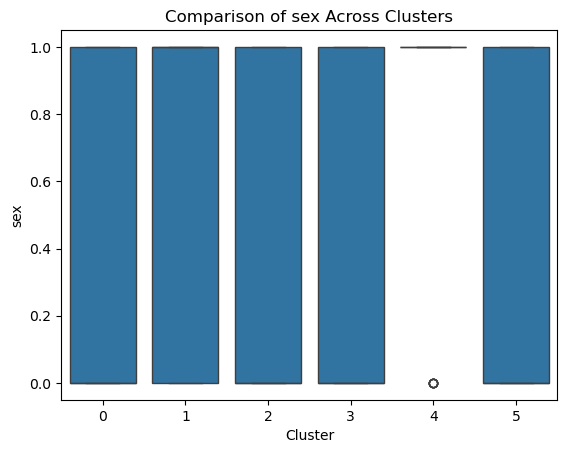

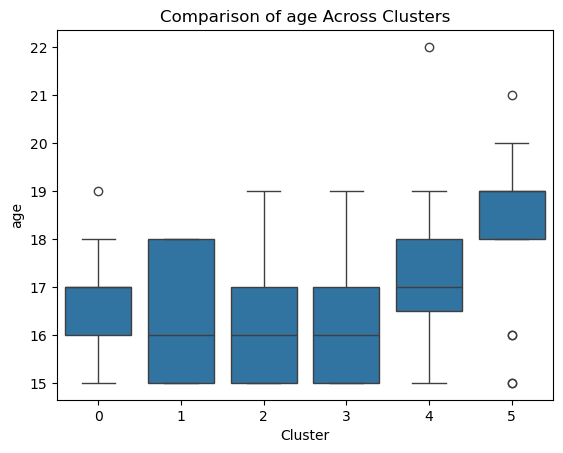

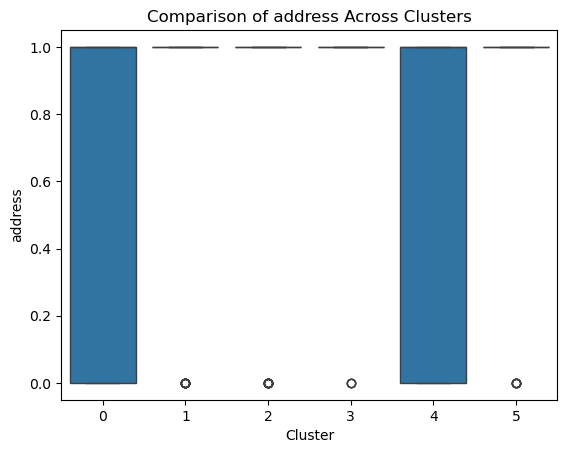

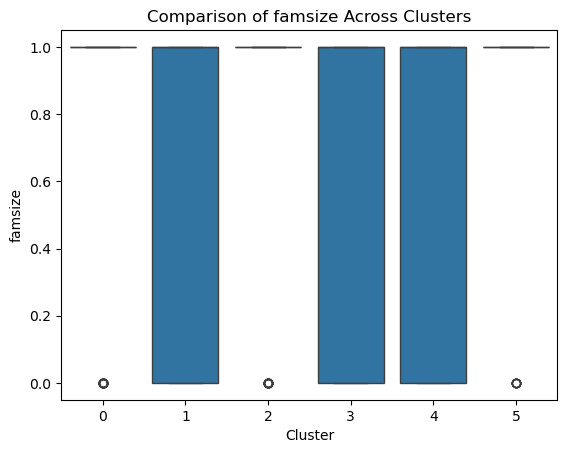

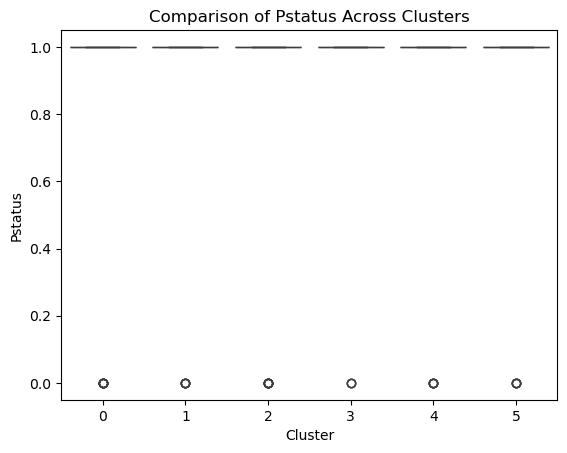

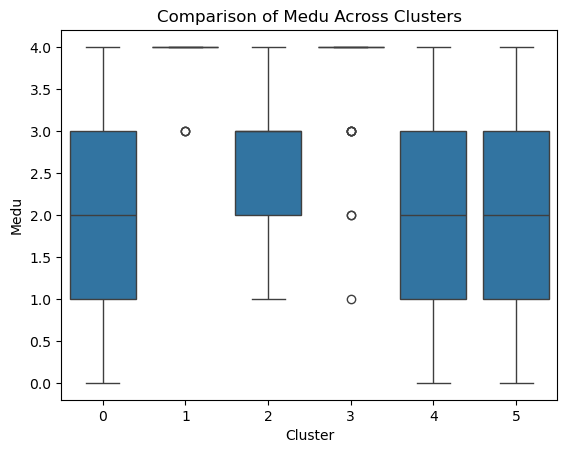

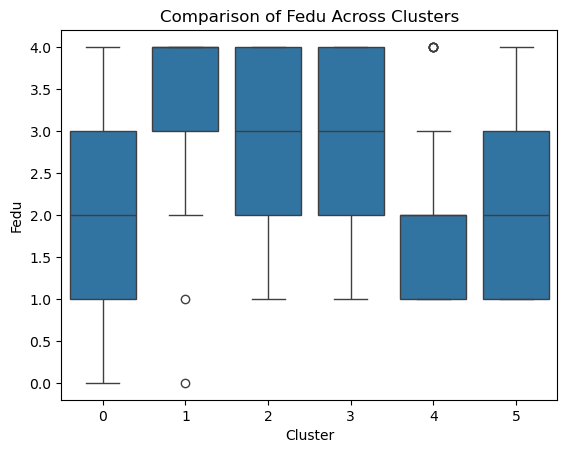

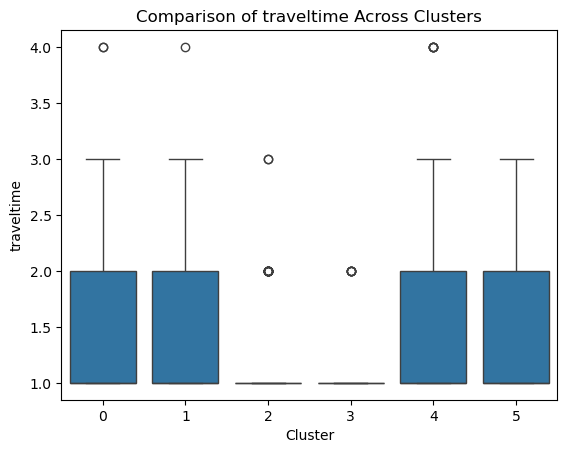

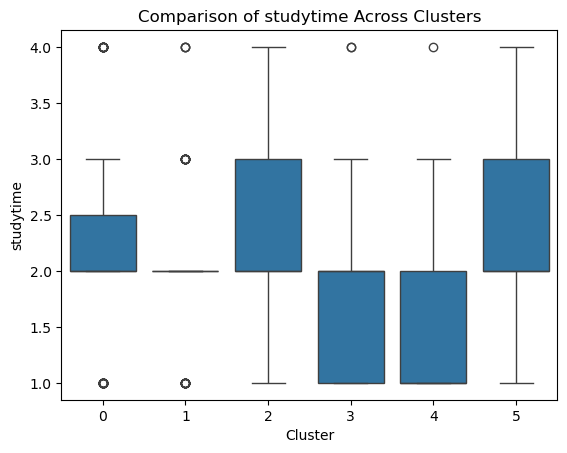

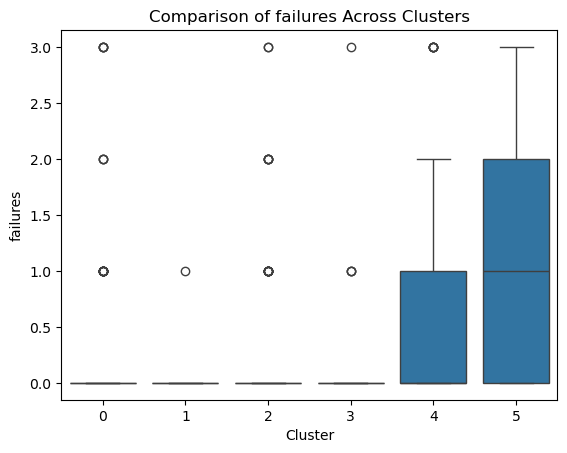

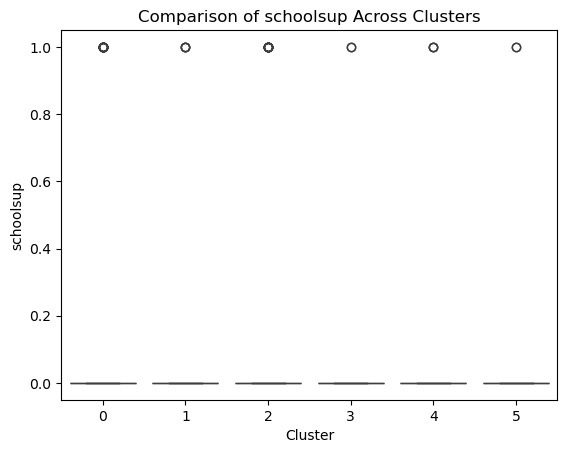

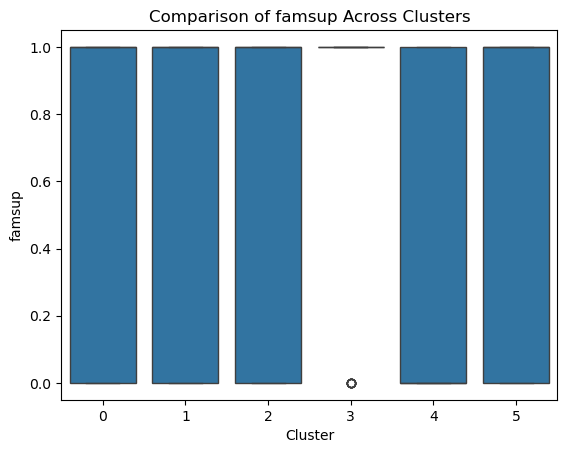

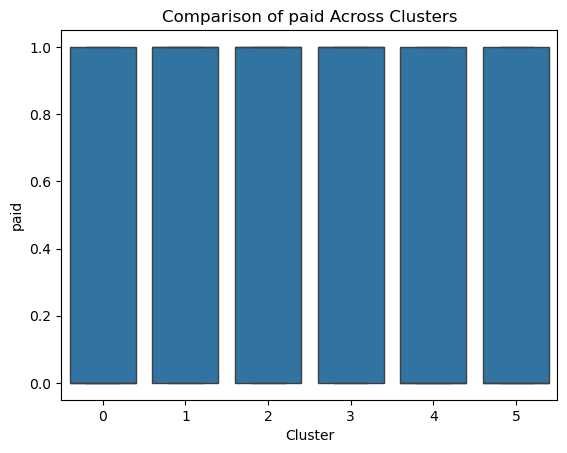

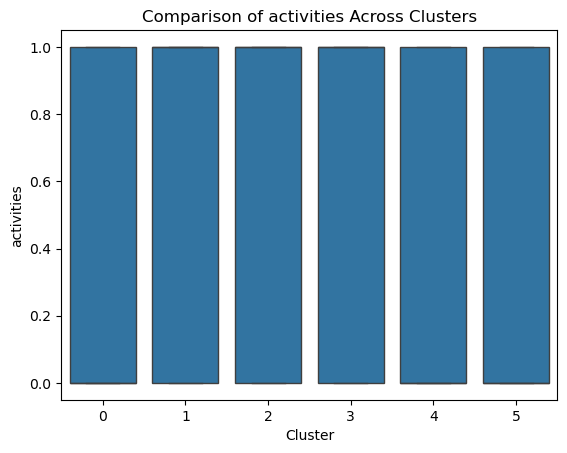

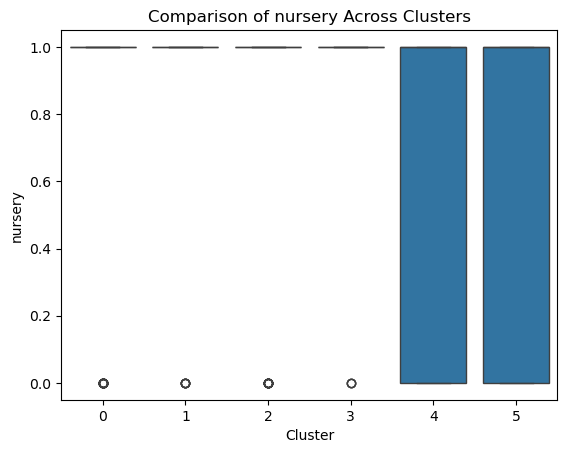

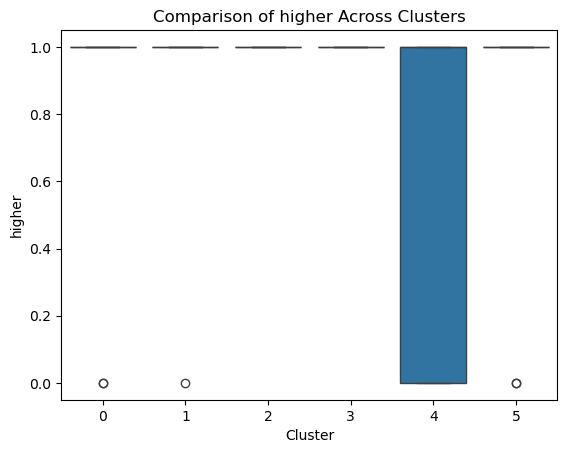

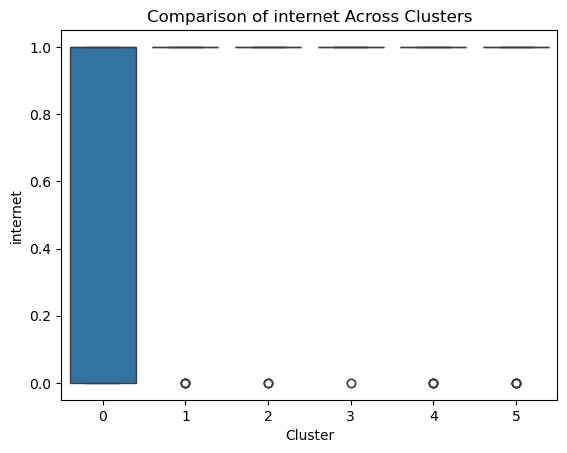

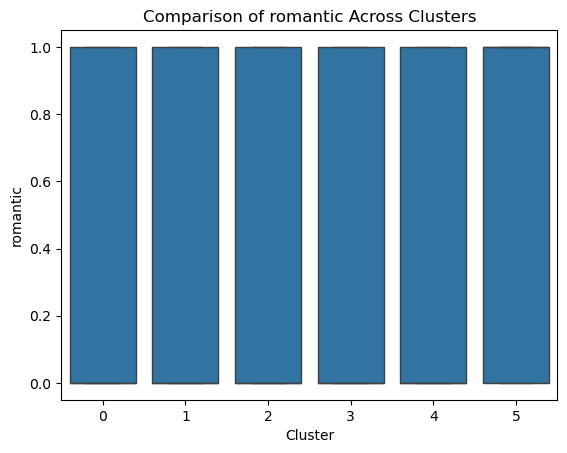

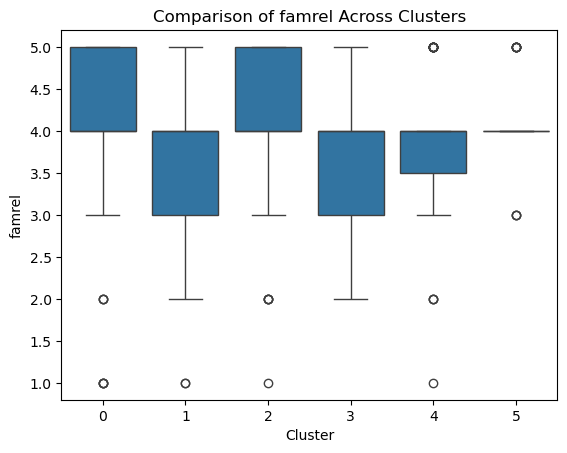

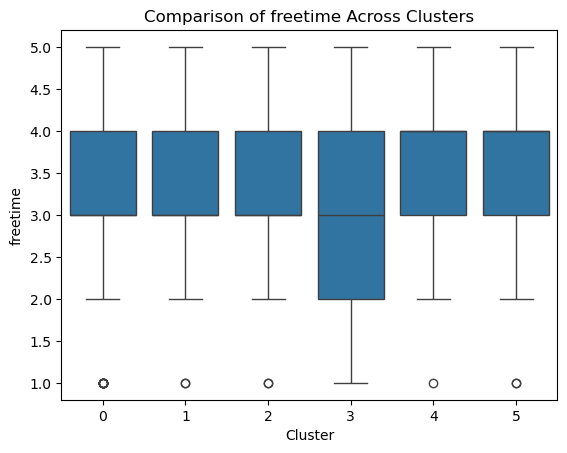

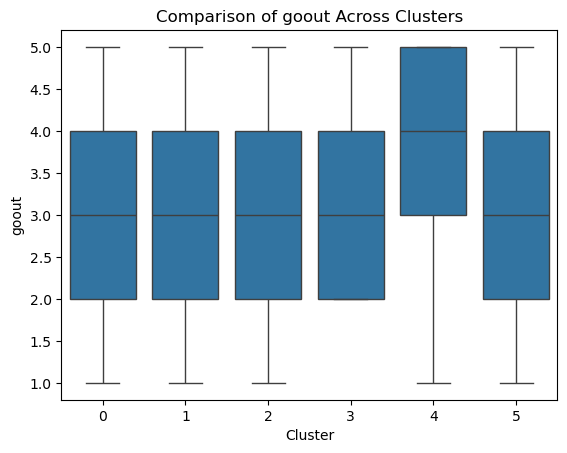

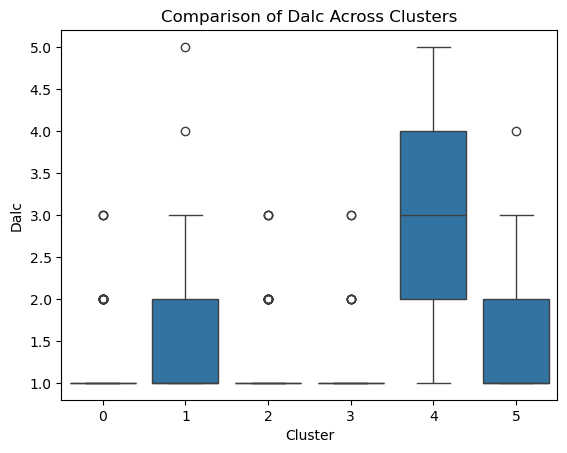

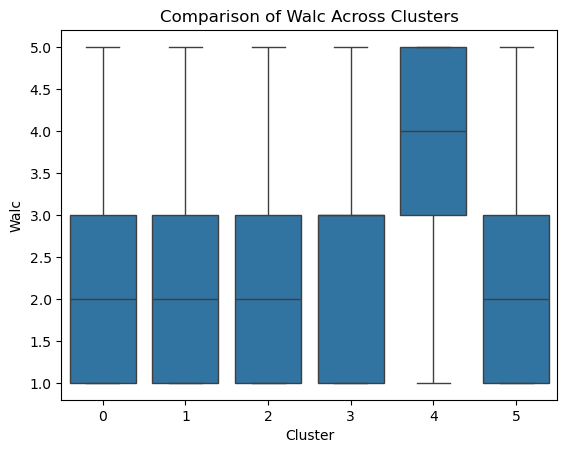

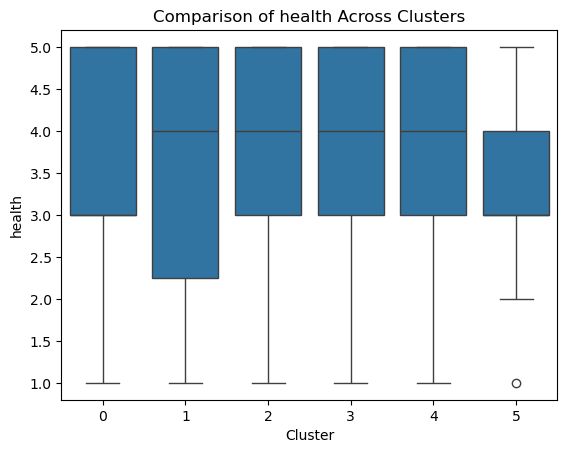

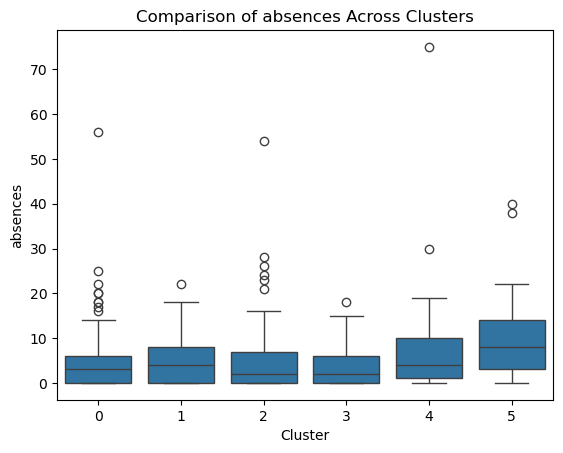

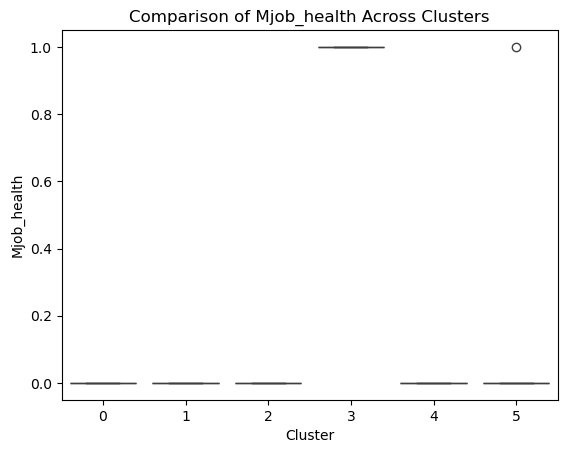

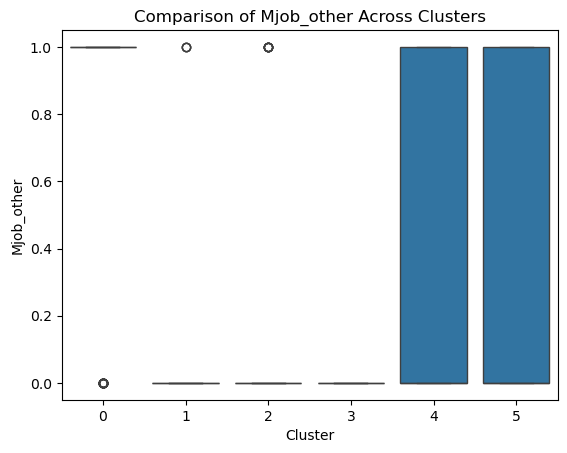

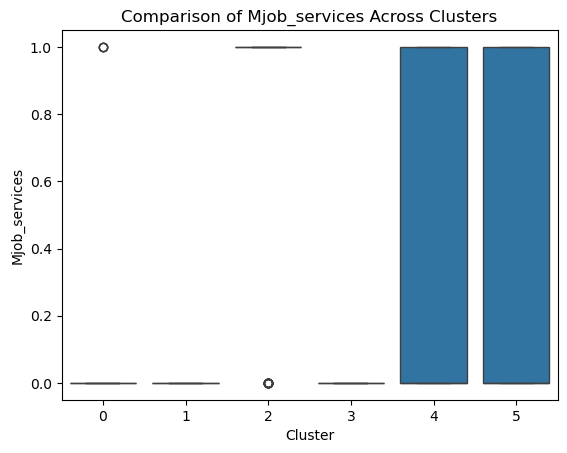

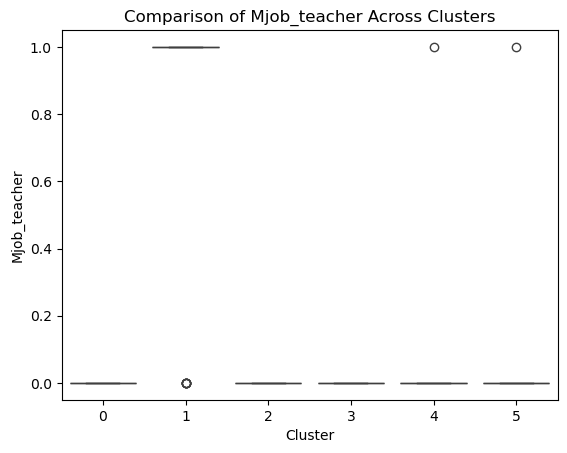

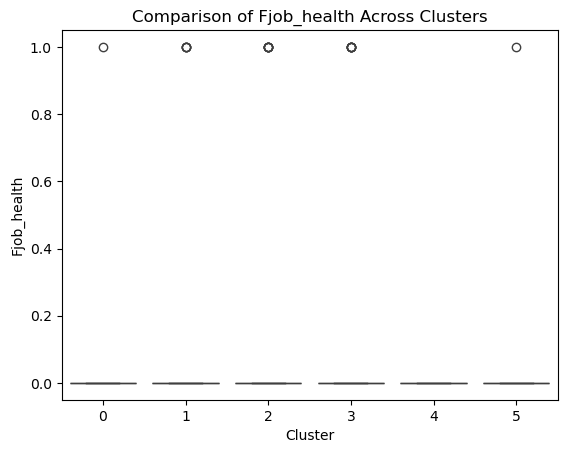

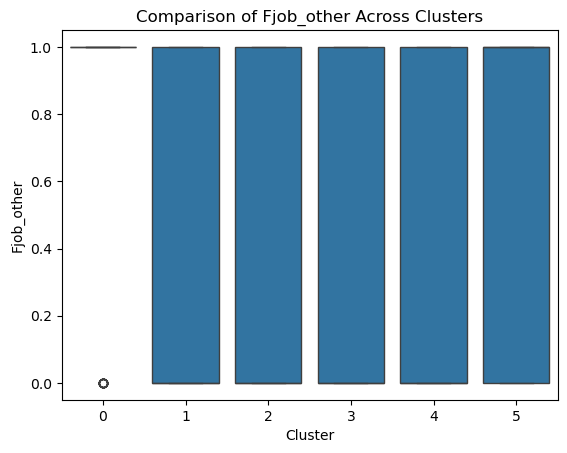

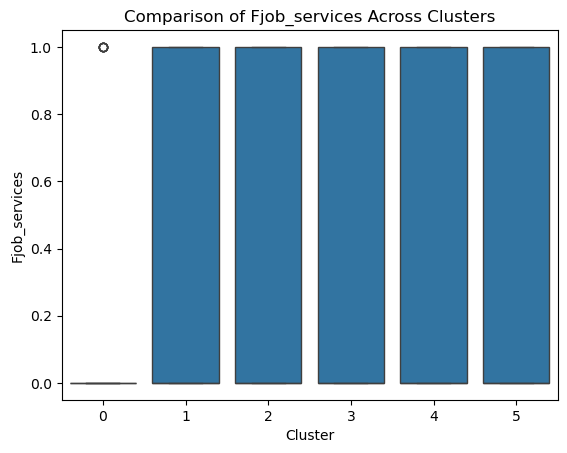

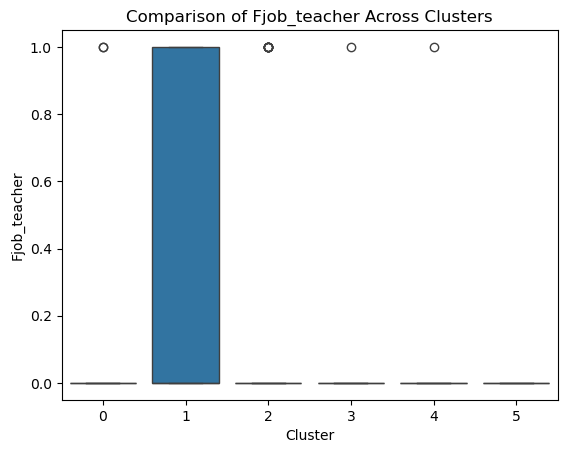

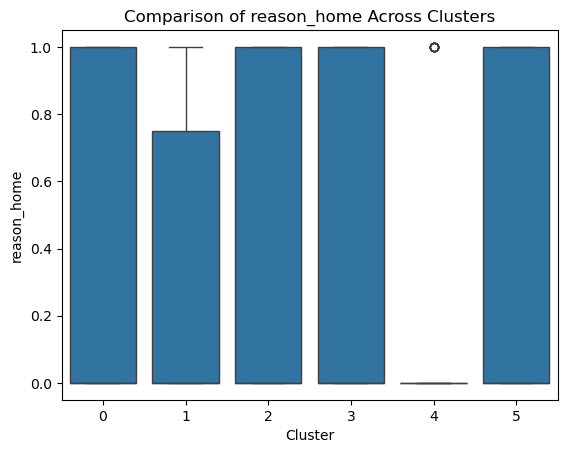

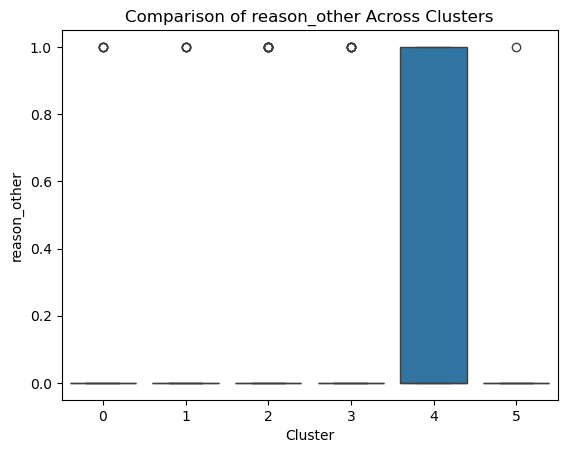

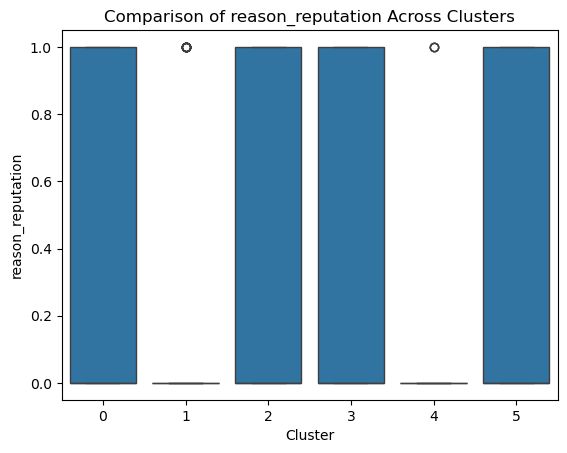

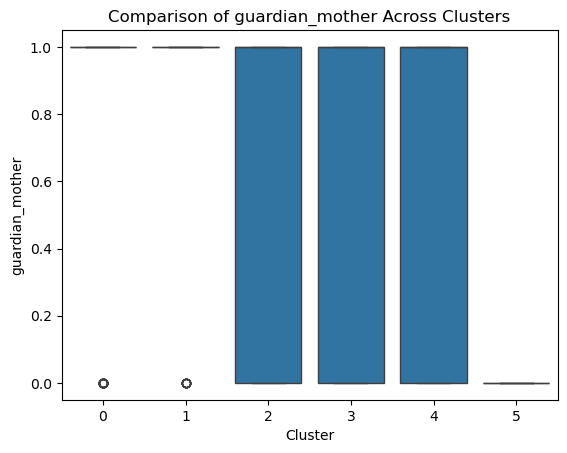

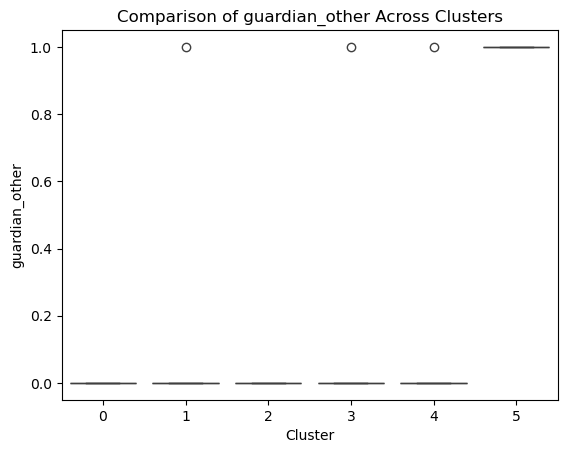

In [283]:
#boxplots of each feature by clusters
features = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other'
]

for feature in features:
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} Across Clusters')
    #plt.savefig(f'boxplot_{feature}.png', dpi=300, bbox_inches='tight') #saving images
    plt.show()

In [284]:
#using pca to visulaize custers in 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_reduced = pca.fit_transform(X_scaled)

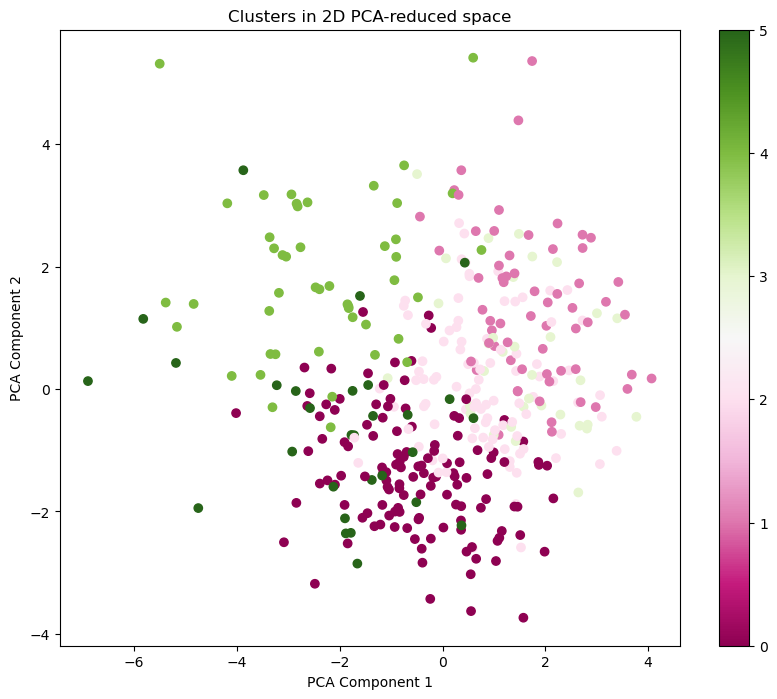

In [285]:
#plotting 2D figure
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c=kmeans.labels_, cmap='PiYG') #x-axis component, y-axis component, label colors
plt.colorbar(scatter)
plt.title('Clusters in 2D PCA-reduced space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()